<center>
<img src="https://i.ibb.co/b3T5hkz/logo.png" alt="logo" border="0" width=600>


---
## 01. A Classification Neural Network with TensorFlow


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Abstract

In this notebook we will implement a classification neural network to represent a linear model using `TensorFlow`.

---

## Stellar Types

We will consider a dataset from [Deepraj Baidya](https://www.kaggle.com/deepu1109) available at

[https://www.kaggle.com/datasets/deepu1109/star-dataset](https://www.kaggle.com/datasets/deepu1109/star-dataset)


This is a dataset includes 240 objects (samples) and 7 features of stars

- Absolute Temperature [$K$]
- Relative Luminosity [$L/L_{\odot}$]
- Relative Radius [$R/R_{\odot}$]
- Absolute Magnitude [$M_v$]
- Star Color [white,Red,Blue,Yellow,yellow-orange etc]
- Spectral Class [O,B,A,F,G,K,M]
- **Star Type [Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiant, HyperGiant]**

where 

$L_{\odot} = 3.828 x 10^26$ Watts (Avg Luminosity of Sun)

$R_{\odot} = 6.9551 x 10^8$ m (Avg Radius of Sun).

The data is a combination of observational and synthetic values. We want to train a decision tree algorithm that predicts the *Star Type* from the other 6 features in the dataset.

---

## The data

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd


df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Neural Networks/02. Classification Networks/6class.csv')
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


We will use this data to obtain the Hertzprung-Rusell diagram,

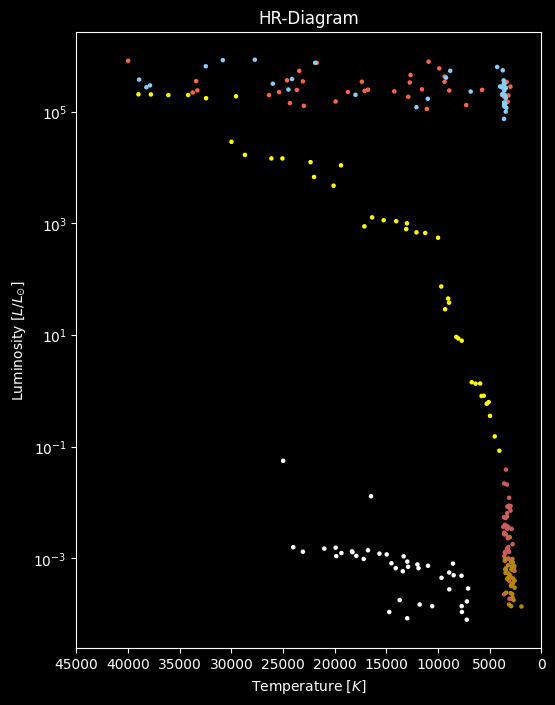

In [8]:
colors = {0:'darkgoldenrod' , 1:'indianred', 2:'white', 3:'yellow', 4:'tomato', 5:'lightskyblue'}

plt.style.use('dark_background')
plt.figure(figsize=(6,8))
plt.scatter(df['Temperature (K)'], df['Luminosity(L/Lo)'], marker='.',
            c = [colors[i] for i in df['Star type']],
            s=20)

plt.xlim(45000,0)
plt.yscale('log')
plt.xlabel(r'Temperature [$K$]')
plt.ylabel(r'Luminosity [$L/L_{\odot}$]')
plt.title('HR-Diagram')
plt.show()

---
## Preparing the Data

We will transform the features 'Temperature (K)' and 'Luminosity(L/Lo)' in the dataframe into a NumPy array.

In [9]:
X = df[['Temperature (K)','Luminosity(L/Lo)']].to_numpy()
X[:10]

array([[3.068e+03, 2.400e-03],
       [3.042e+03, 5.000e-04],
       [2.600e+03, 3.000e-04],
       [2.800e+03, 2.000e-04],
       [1.939e+03, 1.380e-04],
       [2.840e+03, 6.500e-04],
       [2.637e+03, 7.300e-04],
       [2.600e+03, 4.000e-04],
       [2.650e+03, 6.900e-04],
       [2.700e+03, 1.800e-04]])

The targets will be the 'Star type' feature in the dataframe.

In [10]:
y = df['Star type'].to_numpy()
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

We will split the set into training and test subsets.




In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((180, 2), (60, 2), (180,), (60,))

Due to the range of values in these two features, we will use the `StandardScaler()` from `SciKitLearn`` to scale the values.

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

---
## Modelling the Problem using a Classification Neural Network

We want to train a neural network model that reads the features and classify the objects according to 'Star type'. Therefore we will implement the following configuration:

- An input layer that reads the data. This will be a  layer with 2 neurons.

- We will use 2 hidden dense layer with 16 neurons and a ReLU activation (ReLU will ignore negative values)

- Finally we will incorporate an output dense layer with 6 neurons (because the number of classes (targets) in the set goes from 0 to 5) and a 'softmax' activation function.

- The model will be a 'Sequential' neural network.

In [14]:
import tensorflow as tf


# input layer: The input is a set of 2 inputs
inputlyr = tf.keras.layers.Dense(units=2)

# hidden layers with 50 neurons and relu
hdnlyr01 = tf.keras.layers.Dense(units=16, activation=tf.nn.relu)
hdnlyr02 = tf.keras.layers.Dense(units=16, activation=tf.nn.relu)

# output layer
outlyr = tf.keras.layers.Dense(units=6, activation=tf.nn.softmax)


model = tf.keras.Sequential([inputlyr, hdnlyr01, hdnlyr02, outlyr])

In order to compile the neural network we will include the [ADAM](https://keras.io/api/optimizers/adam/) optimizer, the [SparseCategoricalCrossentropy](https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class) loss function and the [accuracy](https://keras.io/api/metrics/accuracy_metrics/#accuracy-class) metric.

In [15]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

### The CategoricalCrossentropy and the SparseCategoricalCrossentropy loss functions 

The [CategoricalCrossentropy](https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class) and the [SparseCategoricalCrossentropy](https://keras.io/api/losses/probabilistic_losses/#sparsecategoricalcrossentropy-class) loss functions are used to measure the  cost of a classification model.

In order to use these function, the algorithm may use and encoding to represent the targets. For example, if one has some categorical targets, they are first represented as integer values:

- TargetA ---> 0 
- TargetB ---> 1
- TargetC ---> 2
- TargetD ---> 3
...

Under this encoding, we can use the 'sparsecategorical_crossentropy' function which is defined as

\begin{equation}
J(w) = -\sum_{i=1}^N y_i\log (y_i^p) 
\end{equation}



Another representation is obtained by using the **one-hot encoding**, which is based on the use of binary vectors. In this case each integer assigned to the categorical targets is represented as a binary vector, that is all zero values except the index of the integer which is marked with a 1. For example:

- TargetA ---> 0  ---> [1 0 0 0]
- TargetB ---> 1  ---> [0 1 0 0]
- TargetC ---> 2  ---> [0 0 1 0]
- TargetD ---> 3  ---> [0 0 0 1]
...

Under this encoding, we can use the 'categorical_crossentropy' function which is defined as before

\begin{equation}
J(w) = -\sum_{i=1}^N y_i \log (y_i^p) 
\end{equation}




### Metrics

A metric is a function that is used to judge the performance of the model.

Metric functions are similar to loss functions, except that the results from evaluating a metric are not used when training the model (In fact, one can use any loss function as a metric).

Keras includes many [metrics](https://keras.io/api/metrics/):

**Accuracy metrics**
- Accuracy class
- BinaryAccuracy class
- CategoricalAccuracy class
- SparseCategoricalAccuracy class
- TopKCategoricalAccuracy class
- SparseTopKCategoricalAccuracy class

**Probabilistic metrics**
- BinaryCrossentropy class
- CategoricalCrossentropy class
- SparseCategoricalCrossentropy class
- KLDivergence class
- Poisson class

**Regression metrics**
- MeanSquaredError class
- RootMeanSquaredError class
- MeanAbsoluteError class
- MeanAbsolutePercentageError class
- MeanSquaredLogarithmicError class
- CosineSimilarity class
- LogCoshError class

**Classification metrics based on True/False positives & negatives**
- AUC class
- Precision class
- Recall class
- TruePositives class
- TrueNegatives class
- FalsePositives class
- FalseNegatives class
- PrecisionAtRecall class
- SensitivityAtSpecificity class
- SpecificityAtSensitivity class
- Image segmentation metrics
- MeanIoU class
- Hinge metrics for "maximum-margin" classification
- Hinge class
- SquaredHinge class
- CategoricalHinge class

---
## Training the Network

Now we will train the model using the train-sets and 1000 epochs.

In [16]:
print('Training...')

history = model.fit(X_train, y_train, epochs=2000, verbose=False)
print('Model is ready!!')

Training...
Model is ready!!


---
## Testing the Model

Now we will use the test subsets to probe the model. Using the '.evaluate()' method, we obtain the accuracy of the model (using the metric defined above),

In [17]:
test_loss, test_acc = model.evaluate(X_train,  y_train, verbose=2)

print('\nTest accuracy:', test_acc)

6/6 - 0s - loss: 0.4838 - accuracy: 0.7778 - 181ms/epoch - 30ms/step

Test accuracy: 0.7777777910232544


In [18]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

2/2 - 0s - loss: 0.8706 - accuracy: 0.6167 - 30ms/epoch - 15ms/step

Test accuracy: 0.6166666746139526


The result for a particular sample is a collection of probabilities associated with each of the possible targets (number of stars from 0 to 5),

In [25]:
predictions= model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [30]:
predictions[42]

array([6.89454782e-06, 1.18787025e-08, 4.80537887e-26, 5.34529354e-09,
       1.35270461e-01, 8.64722669e-01], dtype=float32)

Since we use the activation function 'softmax' in the output layer, the sum of all the probabilities for a single sample is 1,

In [31]:
sum(predictions[42])

1.000000042336509

Using the function 'np.argmax()' we obtain the index corresponding to the maximum probability,

In [32]:
np.argmax(predictions[42])

5

In [33]:
y_test[42]

5

The training history of the model shows the loss function magnitude at each epoch,

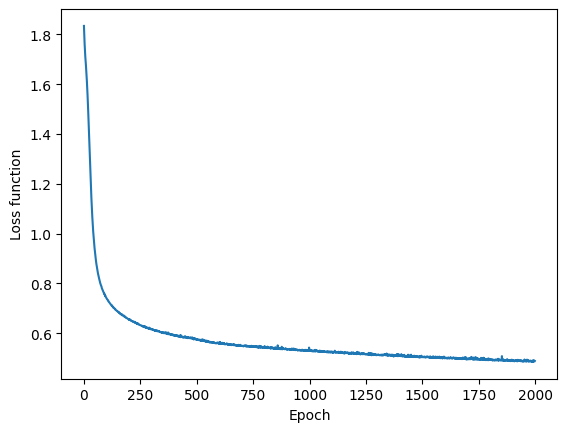

In [34]:
plt.style.use('default')
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Loss function')
plt.plot(history.history['loss'])
plt.show()